## Numerical Integration 

Given a function $f(x)$, we want to approximate the integral of $f(x)$, $\int_a^b f(x) dx$, over the total interval $[a,b]$.

To accomplish this goal, we assume that the interval has been discretized into a numeral grid, $x$, consisting of $n+1$ points with spacing, $h=(b−a)/n$. Here, we denote each point in $x$ by $X_i$, where $x_0=a$ and $x_n=b$. 

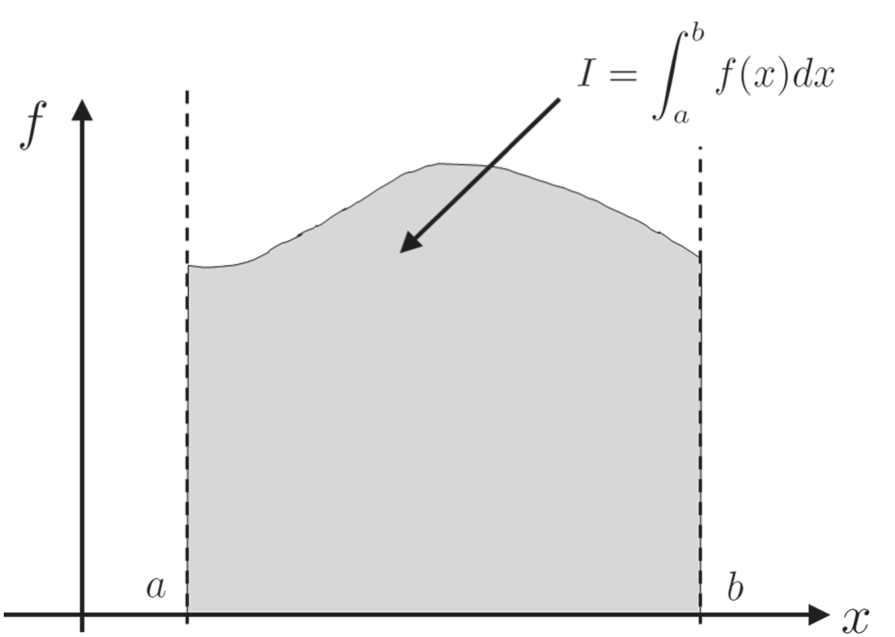


### Rieman's Integral 

The simplest method for approximating integrals is by summing the area of rectangles that are defined for each subinterval. The width of the rectangle is $x_{i+1}−x_{i}=h$, and the height is defined by a function value $f(x)$ for some x in the subinterval. An obvious choice for the height is the function value at the left endpoint, $x_i$, or the right endpoint, $x_{i+1}$.

$$
\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} hf(x_i),
$$

or 

$$
\int_a^b f(x) dx \approx \sum_{i = 1}^{n} hf(x_i),
$$


### Trapezoid Rule 

The Trapezoid Rule fits a trapezoid into each subinterval and sums the areas of the trapezoid to approximate the total integral. 

$$
\int_a^b f(x) dx \approx \sum_{i=0}^{n-1} h\frac{f(x_i) + f(x_{i+1})}{2}
$$


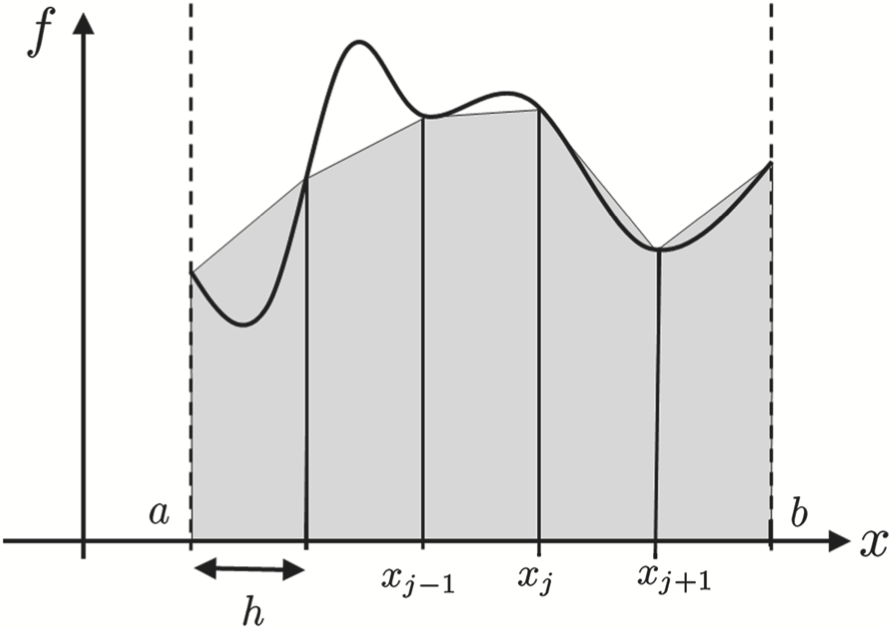

### Simpson's Rule 

The Simpson's rule is an application of polynomial regression.

Simpson’s Rule approximates the area under $f(x)$ by fitting a quadratic polynomial through the points $(x_{i−1},f(x_{i−1})),(x_{i},f(x_{i}))$, and $(x_{i+1},f(x_{i+1}))$, which is a unique polynomial, and then integrating the quadratic polynomial exactly. The following shows this integral approximation for an arbitrary function.

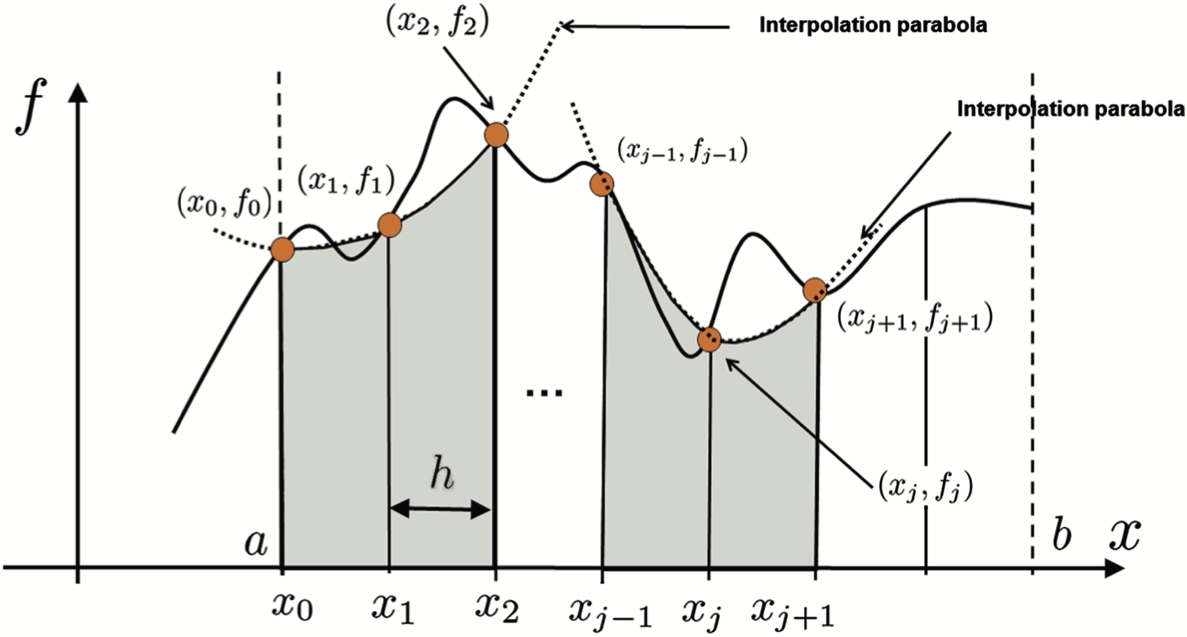

In [5]:
# numerical example

import numpy as np
from scipy.integrate import trapz, simps

a = 0
b = np.pi
n = 5
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])
I_simps = simps(f,x)

print(I_trapz)
print(I_trap)
print(I_simps)

1.8961188979370398
1.8961188979370398
2.0045597549844207


Sometimes we want to know the approximated cumulative integral. That is, we want to know $F(X) = \int_{x_0}^X f(x) dx$. 

For this purpose, it is useful to use the cumtrapz function cumsum, which takes the same input arguments as trapz.

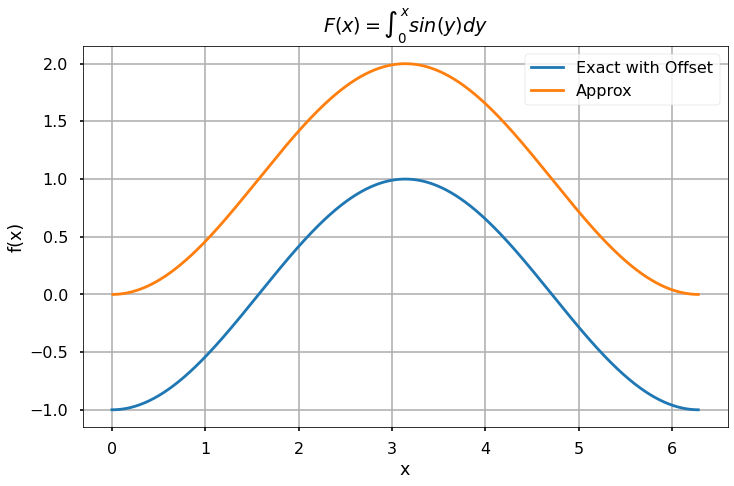

In [13]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = np.arange(0, 2*np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

Note that both signals vary in the same way, to take the of the offset, you would need to provide an initial value for the integration. 